### Import required libraries

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [198]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures 

In [127]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

## Explore the data

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualization of data

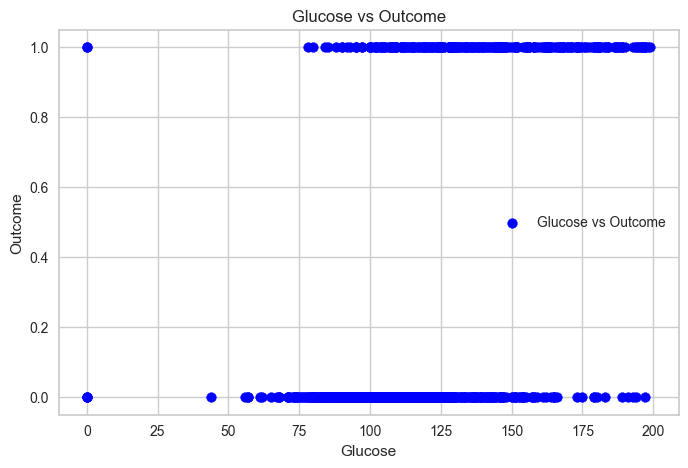

In [5]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Glucose'], df['Outcome'], color='blue', label='Glucose vs Outcome')
plt.title("Glucose vs Outcome")
plt.xlabel(f"Glucose")
plt.ylabel("Outcome")
plt.legend()
plt.show()

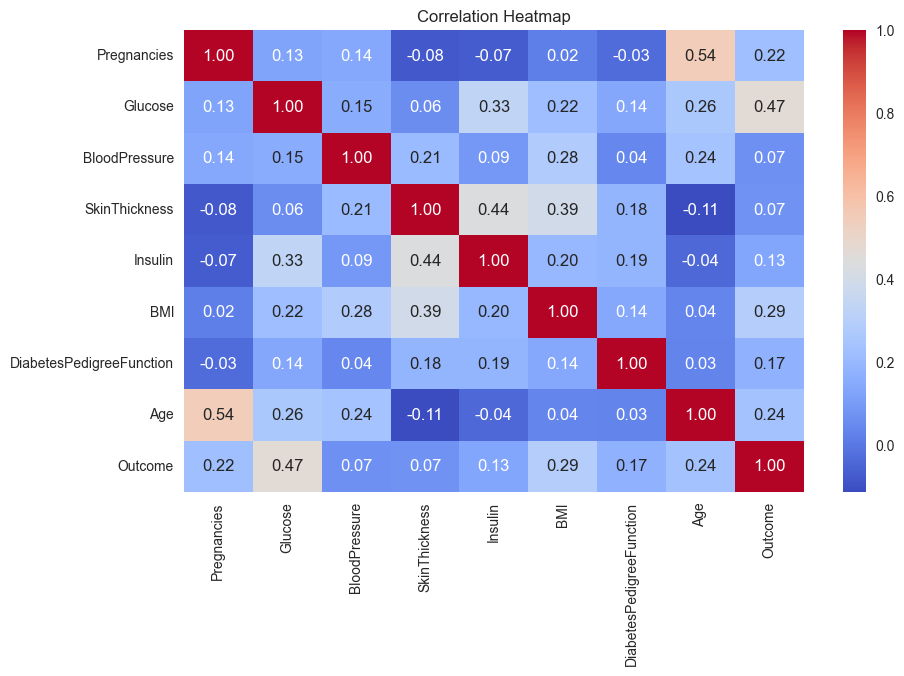

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

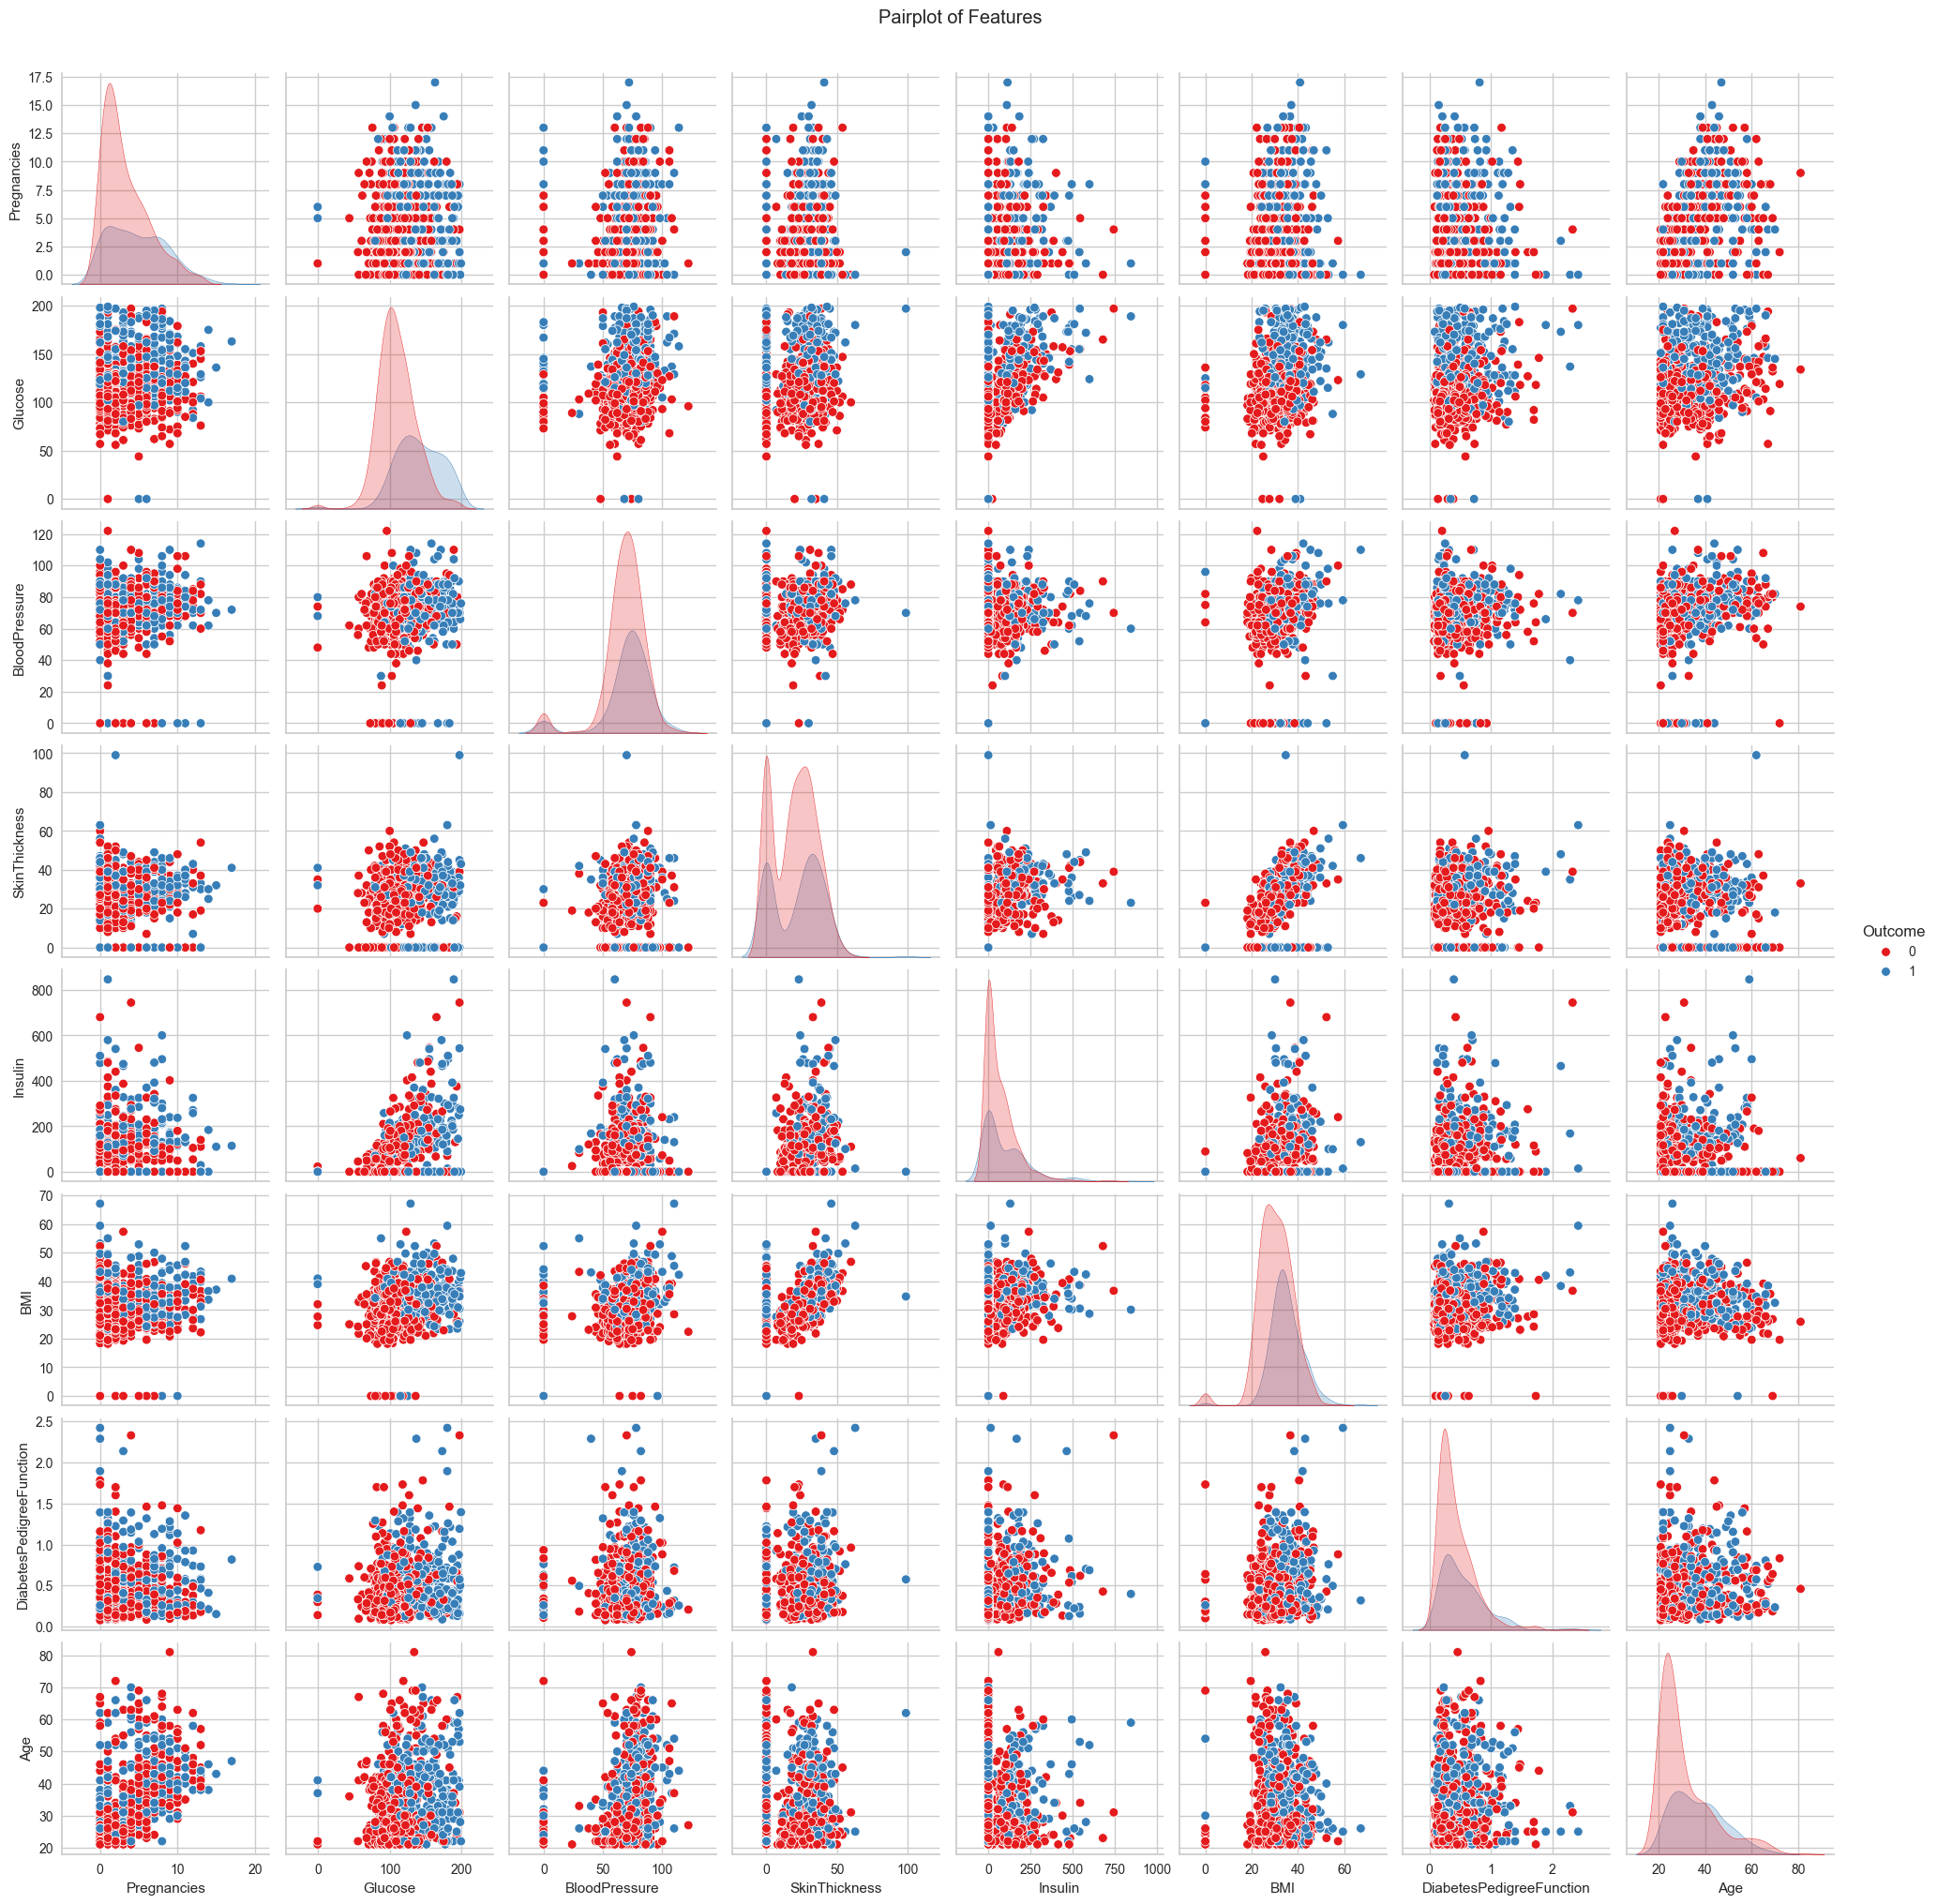

In [11]:
sns.pairplot(df, hue="Outcome", diag_kind="kde", palette="Set1")
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

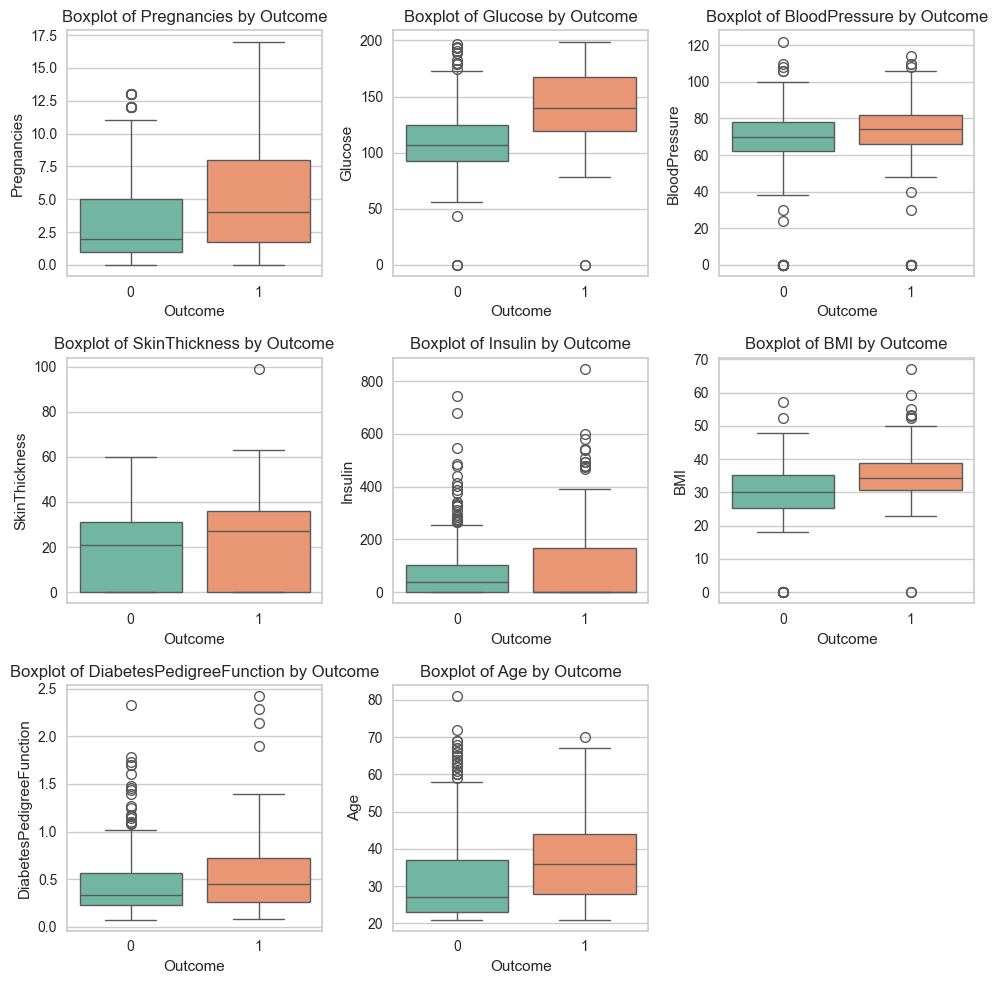

In [24]:
features = df.columns[:-1]  
plt.figure(figsize=(10, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Outcome", y=feature, data=df, palette="Set2")
    plt.title(f"Boxplot of {feature} by Outcome")

plt.tight_layout()
plt.show()

## Preparing the data

In [178]:
# make a copy of the dataset
data = df.copy()

In [179]:
data.fillna(df.median(), inplace=True)

In [180]:
# Feature Selection : Dropping columns that are not useful
data.drop(columns='SkinThickness',inplace=True,axis=1)

In [173]:
# Feature Scaling
scaler = StandardScaler()
columns_to_scale = data.select_dtypes(include=np.number).columns.tolist()
data[columns_to_scale]=scaler.fit_transform(data[columns_to_scale])

In [181]:
data.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


## Trying different models

In [182]:
X = data.drop('Outcome', axis=1)  
y = data['Outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7467532467532467
Confusion Matrix:
 [[79 20]
 [19 36]]


In [184]:
model = MLPClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
Confusion Matrix:
 [[85 14]
 [30 25]]


In [185]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix:
 [[79 20]
 [16 39]]


In [186]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))


gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix:
 [[79 20]
 [16 39]]
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[79 20]
 [16 39]]


In [187]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7467532467532467
Confusion Matrix:
 [[79 20]
 [19 36]]


In [188]:
model = SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7662337662337663
Confusion Matrix:
 [[87 12]
 [24 31]]


In [189]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test,y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test,y_pred))

Accuracy: 0.7142857142857143
Confusion Matrix:
 [[74 25]
 [19 36]]


##### Best 3 Models Based on Accuracy:
Logistic Regression: Accuracy of 0.7609

Random Forest Classifier: Accuracy of 0.7464

Support Vector Classifier (SVC): Accuracy of 0.7391

## Fine tune the models

In [194]:
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(random_state=42)

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best Score for Logistic Regression:", grid_search_log_reg.best_score_)


Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best Score for Logistic Regression: 0.7687858190057311


In [193]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score for Random Forest:", grid_search_rf.best_score_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best Score for Random Forest: 0.7850593096094897


In [192]:
svc_model = SVC(random_state=42)

# Define the parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

# Create GridSearchCV
grid_search_svc = GridSearchCV(svc_model, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters for SVC:", grid_search_svc.best_params_)
print("Best Score for SVC:", grid_search_svc.best_score_)


Best Parameters for SVC: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}
Best Score for SVC: 0.765480474476876


##### Model with best performance after fine tuning: Logistic Regression

### Saving the model

In [196]:
import joblib

best_model = grid_search_log_reg.best_estimator_
joblib.dump(best_model, 'best_logistic_regression_model.pkl')

['best_logistic_regression_model.pkl']